# Using Built-in Functions in OG-Core

In [2]:
# Import packages
import numpy as np
import pandas as pd
import os
import json
import pickle
from ogcore.parameters import Specifications
from ogcore.execute import runner
import ogcore.output_plots as op
import ogcore.output_tables as ot
import ogcore.demographics as demog
from ogcore.utils import safe_read_pickle
import multiprocessing
from distributed import Client
import matplotlib.pyplot as plt

# set plot style
plt.style.use("ogcore.OGcorePlots")

In [3]:
# Load baseline and reform parameters, steady-state, and transition path
# objects
base_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-ZAF/examples/" +
    "OG-ZAF-Example/OUTPUT_BASELINE"
)
ref_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-ZAF/examples/" +
    "OG-ZAF-Example/OUTPUT_REFORM"
)
p_bas = pickle.load(open(os.path.join(base_path, "model_params.pkl"), "rb"))
p_ref = pickle.load(open(os.path.join(ref_path, "model_params.pkl"), "rb"))
ss_vars_bas = pickle.load(
    open(os.path.join(base_path, "SS", "SS_vars.pkl"), "rb")
)
ss_vars_ref = pickle.load(
    open(os.path.join(ref_path, "SS", "SS_vars.pkl"), "rb")
)
tpi_vars_bas = pickle.load(
    open(os.path.join(base_path, "TPI", "TPI_vars.pkl"), "rb")
)
tpi_vars_ref = pickle.load(
    open(os.path.join(ref_path, "TPI", "TPI_vars.pkl"), "rb")
)

## 1. Output_plots.py
Let's look at the [`ogcore/output_plots.py`](https://github.com/PSLmodels/OG-Core/blob/master/ogcore/output_plots.py) module. We have imported this module above with the `import ogcore.output_plots as op` line.

The input arguments for the [`plot_aggregates()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html) function can be found in the Python API documentation for OG-Core.

```python
plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=None,
    reform_params=None,
    var_list=["Y", "C", "K", "L"],
    plot_type="pct_diff",
    stationarized=True,
    num_years_to_plot=50,
    start_year=DEFAULT_START_YEAR,
    forecast_data=None,
    forecast_units=None,
    vertical_line_years=None,
    plot_title=None,
    path=None,
)
```

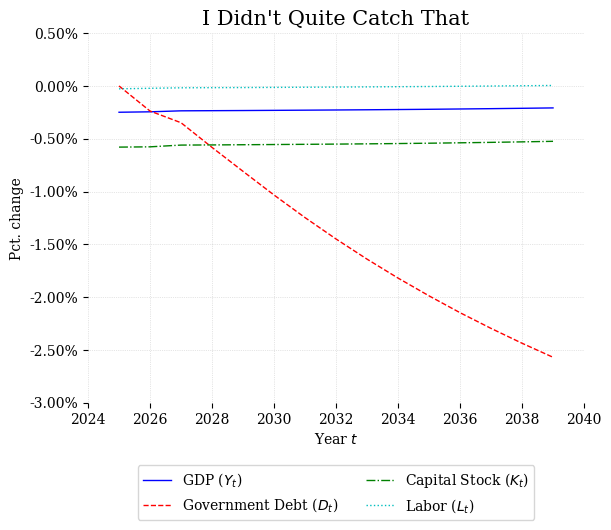

In [6]:
fig1 = op.plot_aggregates(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["Y", "D", "K", "L"],
    plot_type="pct_diff", num_years_to_plot=15,
    vertical_line_years=[p_bas.start_year + p_bas.tG1, p_bas.start_year + p_bas.tG2],
    plot_title="I Didn't Quite Catch That"
)

The [`ability_bar()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html) plot shows percentage change in variables in the first number of years.

```python
ability_bar(
    base_tpi,
    base_params,
    reform_tpi,
    reform_params,
    var="n_mat",
    num_years=5,
    start_year=DEFAULT_START_YEAR,
    plot_title=None,
    path=None,
)
```

The variable `var=` input needs to be one of the variables in the TPI object that varies by ability (e.g., `bmat_splus1`, `bmat_s`, `n_mat`, `c_path`, `bq_path`, `rm_path`, `tr_path`)

In [ ]:
tpi_vars_bas.keys()

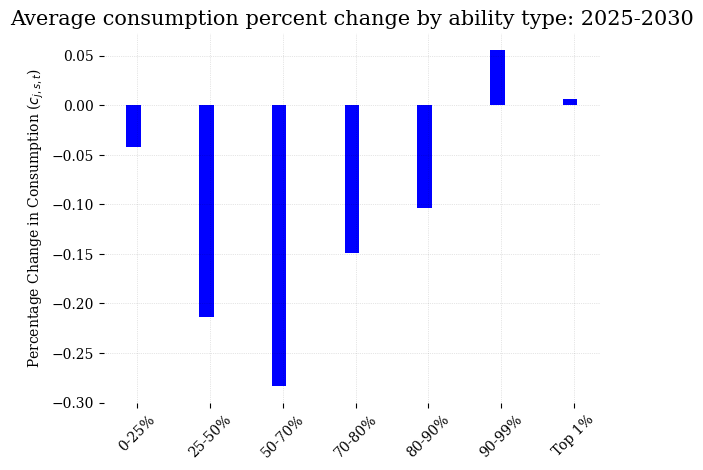

In [8]:
fig2 = op.ability_bar(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var="c_path", num_years=5,
    start_year=p_bas.start_year+5,
    plot_title="Average consumption percent change by ability type: 2025-2030"
)

The other main plotting function [`plot_gdp_ratio()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html) is for plotting variables as a percent of GDP.

```python
plot_gdp_ratio(
    base_tpi,
    base_params,
    reform_tpi=None,
    reform_params=None,
    var_list=["D"],
    plot_type="levels",
    num_years_to_plot=50,
    start_year=DEFAULT_START_YEAR,
    vertical_line_years=None,
    plot_title=None,
    path=None,
)
```

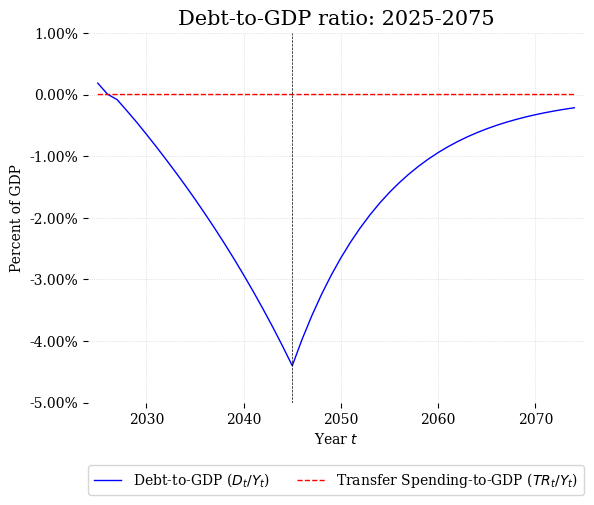

In [11]:
fig3 = op.plot_gdp_ratio(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["D", "TR"], num_years_to_plot=50,
    start_year=p_bas.start_year, plot_type="diff",
    vertical_line_years=[p_bas.start_year + p_bas.tG1, p_bas.start_year + p_bas.tG2],
    plot_title="Debt-to-GDP ratio: 2025-2075"
)

Inequality time series plot [`inequality_plot()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html)

```python
inequality_plot(
    base_tpi,
    base_params,
    reform_tpi=None,
    reform_params=None,
    var="c_path",
    ineq_measure="gini",
    pctiles=None,
    plot_type="levels",
    num_years_to_plot=50,
    start_year=DEFAULT_START_YEAR,
    vertical_line_years=None,
    plot_title=None,
    path=None,
)
```

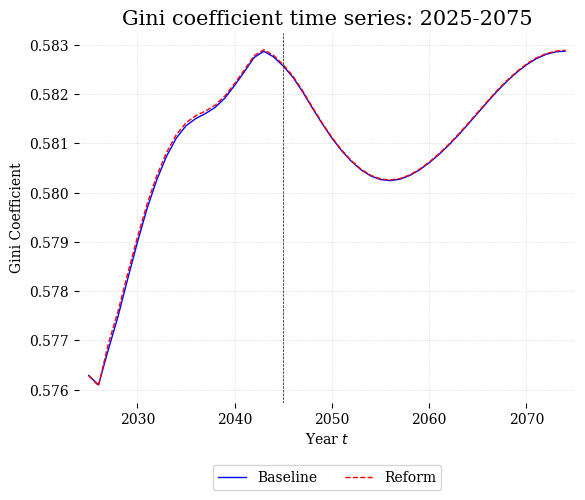

In [12]:
fig4 = op.inequality_plot(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var="y_before_tax_mat",
    ineq_measure="gini", plot_type="levels", num_years_to_plot=50,
    start_year=p_bas.start_year,
    vertical_line_years=[p_bas.start_year + p_bas.tG1, p_bas.start_year + p_bas.tG2],
    plot_title="Gini coefficient time series: 2025-2075"
)

## 2. demographics.py

/opt/anaconda3/envs/ogzaf-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:417: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


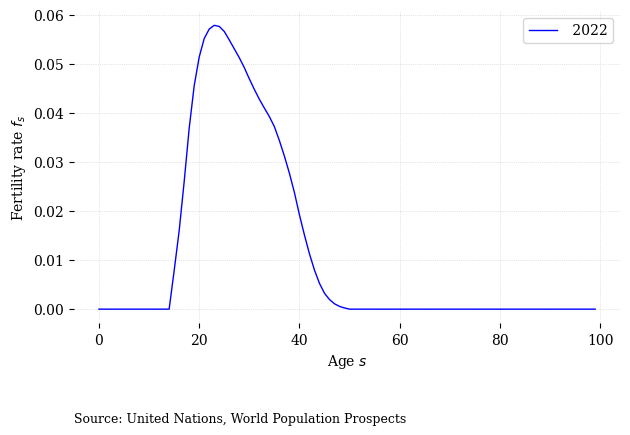

In [13]:
fert_rates, fig = demog.get_fert(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="710",  # South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

/opt/anaconda3/envs/ogzaf-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:417: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


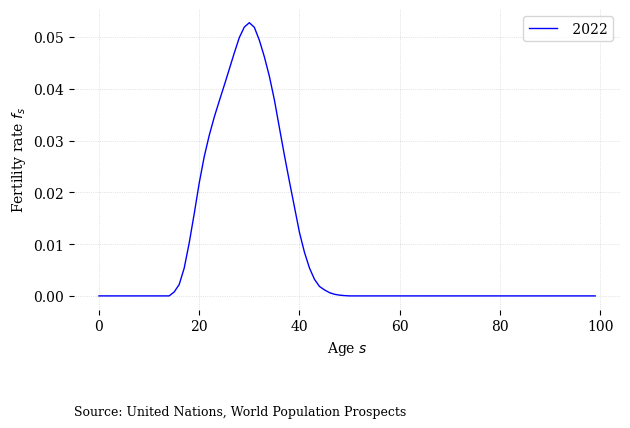

In [14]:
fert_rates, fig = demog.get_fert(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="840",  # South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)